In [85]:
import pandas as pd
import nltk
# nltk.download('punkt') # nltkを初めて実行する場合にはこちらを実行
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

PATH_HEAD = r'C:\Users\猛\Desktop\yoshiki_study\scraping'
df_org = pd.read_csv(PATH_HEAD+'/output/200518_210518.csv', index_col=0, engine='python')
df = df_org.dropna()

In [129]:
df.head()

title  \
�ｻｿ                                                      
1                       An analysis of Uniswap markets   
2    Application of Nonlinear Autoregressive with E...   
3    Branching Networks and Geographic Contagion of...   
4    Buildingsﾃ｢竄ｬ邃｢ Energy Efficiency and the Prob...   
5    Choice of Pension Management Fees and Effects ...   

                                   URL  \
�ｻｿ                                      
1      http://arxiv.org/abs/1911.03380   
2      http://arxiv.org/abs/2005.08735   
3    https://ssrn.com/abstract=3601307   
4    https://ssrn.com/abstract=3601723   
5    https://ssrn.com/abstract=3578375   

                                               summary        Data  
�ｻｿ                                                                 
1    Uniswap---and other constant product markets--...  2020-05-18  
2    This paper selects the NARX neural network as ...  2020-05-18  
3    This paper studies the role of banks' branchin...  2020-05-18  
4    We investigate the relation between buildingsﾃ...  2020-05-18  
5    To shed light on the effects of individual cho...  2020-05-18

## 形態素解析 by nltk

In [87]:
words_title = {str(i) : nltk.word_tokenize(title) for i, title in enumerate(df['title'])}
words_title_list = []
for val in words_title.values():
    if val[0].isascii():
        words_title_list.append(val[0])

# LDA

In [97]:
vec_count = CountVectorizer()
vec_count.fit(words_title_list)
bow = vec_count.transform(words_title_list)
# pd.DataFrame(bow.toarray(), columns=vec_count.get_feature_names())

In [98]:
# LDAのモデル作成と学習
lda = LatentDirichletAllocation(n_components=8)
lda.fit(bow)

LatentDirichletAllocation(n_components=8)

In [102]:
# import pyLDAvis
# import pyLDAvis.sklearn

# # jupyter notebookで結果を表示するために必要
# pyLDAvis.enable_notebook()

# pyLDAvis.sklearn.prepare(
#     lda, # LDAのモデル (LatentDirichletAllocation のインスタンス)
#     bow, # BOWデータ (sparse matrix)
#     vec_count, # CountVectorizer もしくは TfIdfVectorizer のインスタンス
#     mds="pcoa", # mmds, tsne
# )

# word cloud

In [130]:
def view_image(word_cloud, file_name):  
    word_cloud.to_file(PATH_HEAD+'/output/'+str(file_name)+'.png')
    plt.imshow(word_cloud)  
    plt.axis("off")  
    plt.figure()  
    plt.show()  

In [131]:
word_cloud = WordCloud(background_color="white", width=900, height=500).generate(' '.join(words_title_list))
view_image(word_cloud, 'wordcould_title')

<Figure size 432x288 with 0 Axes>

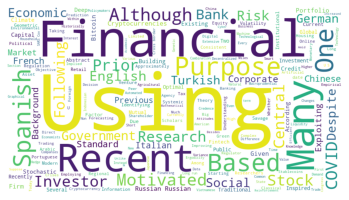

<Figure size 432x288 with 0 Axes>

In [127]:
words_summary = {str(i) : nltk.word_tokenize(summary) for i, summary in enumerate(df['summary'])}
words_summary_list = []
for val in words_summary.values():
    if val[0].isascii():
        words_summary_list.append(val[0])
        
word_cloud = WordCloud(background_color="white", width=900, height=500).generate(' '.join(words_summary_list))
view_image(word_cloud, 'wordcould_summary')